In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar código."></form>''')

BOLETIM EPIDEMIOLóGICO DO QUADRILÀTERO FERRÌFERO

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#importamos o banco de dado
base_out = pd.read_csv('csv_sistemas(47).csv',sep=',', encoding='latin-1')
base_out['contador'] = 1

#segundo banco de dado com o restante dos confirmados.
base_lab = pd.read_csv('csv_laboratorios(9).csv',sep=',', encoding='latin-1')
base_lab['contador'] = 1

base = pd.concat([base_lab, base_out], ignore_index=False)

#Limpeza e oredanção dos dados
from datetime import datetime
base['DATA_NOTIFICACAO'] = pd.to_datetime(base['DATA_NOTIFICACAO'], format='%m/%d/%Y')

base.sort_values('DATA_NOTIFICACAO', inplace=True)

In [98]:
#quadrilátero_ferrifero.groupby(["EVOLUCAO"]).contador.sum()

In [15]:
#seleciono a regiao com a qual vou trabalhar e extrair os dados.
#Definindo municipios interesse
municipios_interesse = ['NOVA LIMA','BELO VALE', 'BETIM', 'BRUMADINHO', 'CONSELHEIRO LAFAIETE', 'CATAS ALTAS', 'BRUMADINHO', 'ALVINOPOLIS', 'BARAO DE COCAIS', 'CAETE','CONGONHAS', 'IBIRITE','IGARAPE', 'ITABIRA','ITABIRITO', 'ITATIAIUÇU','ITAÚNA','JECEABA', 'JOAO MONLEVADE', 'MARIANA', 'MATEUS LEME', 'MOEDA', 'OURO PRETO', 'OURO BRANCO', 'RAPOSOS', 'SAO GONÇALO DO RIO ABAIXO', 'RIO ACIMA', 'RIO MANSO', 'RIO PIRACICABA', 'SABARA', 'SANTA BARBARA', 'SANTA LUZIA', 'SAO JOAQUIM DE BICAS', 'SARZEDO']

#selecionando com isin
quadrilátero_ferrifero = base[base['MUNICIPIO_RESIDENCIA'].isin(municipios_interesse) == True]

In [17]:
confirmados_24h = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['DATA_NOTIFICACAO'] == '2020-07-22']
print("Confirmados nas ultimas 24hrs: ",int(confirmados_24h.contador.sum()))

Confirmados nas ultimas 24hrs:  17


In [18]:
Casos_confirmados = quadrilátero_ferrifero.contador.sum()
print('Casos confirmados: ', int(Casos_confirmados))

Casos confirmados:  8448


In [22]:
em_acompanhamento = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'EM ACOMPANHAMENTO']
em_acompanhamento = em_acompanhamento['contador'].sum()
print('Casos em acompanhamento: ', 'Não informado')

Casos em acompanhamento:  Não informado


In [21]:
recuperados = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'RECUPERADO']
Casos_recuperados = recuperados['contador'].sum()
print('Casos recuperados: ', int(Casos_recuperados))

Casos recuperados:  2766


In [23]:
obitos = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos['contador'].sum()
print('Óbitos: ', int(obitos_OP))

Óbitos:  179


In [24]:
print('')

1_ PERFIL EPIDEMIOLOGICO DOS CONFIRMADOS:

POR SEXO:

In [25]:
#quadrilátero_ferrifero.groupby(['SEXO']).contador.sum()

In [26]:
Homens_confirmados = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['SEXO'] == 'MASCULINO')]
Homens_confirmados_vivos = Homens_confirmados[(Homens_confirmados.EVOLUCAO != 'OBITO')]
Homens_confirmados_vivos = Homens_confirmados_vivos['contador'].sum()
print('Homens confirmados: ', int(Homens_confirmados_vivos))

Homens confirmados:  4729


In [27]:
Mulheres_confirmadas = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['SEXO'] == 'FEMININO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas[(Mulheres_confirmadas.EVOLUCAO != 'OBITO')]
Mulheres_confirmadas_vivas = Mulheres_confirmadas_vivas['contador'].sum()
print('Mulheres confirmadas: ', int(Mulheres_confirmadas_vivas))

Mulheres confirmadas:  3402


In [28]:
sem_informacao_sexo = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['SEXO'] == 'NAO INFORMADO']
print('Sem informação do sexo: ', int(sem_informacao_sexo.contador.sum()))

Sem informação do sexo:  138


In [29]:
perct_por_sexo_H_vivos = Homens_confirmados_vivos/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem homens: ","{:.0%}".format(perct_por_sexo_H_vivos));

Porcentagem homens:  58%


In [30]:
perct_por_sexo_M_vivos = Mulheres_confirmadas_vivas/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem mulheres: ","{:.0%}".format(perct_por_sexo_M_vivos));

Porcentagem mulheres:  42%


In [31]:
N_vivo = Mulheres_confirmadas_vivas + Homens_confirmados_vivos
print("N total: ",int(N_vivo))

N total:  8131


In [32]:
print('')

COMORBIDADE:

In [33]:
com_comorbidade = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['COMORBIDADE'] == 'SIM')]
Com_comorbidade_vivos = com_comorbidade[(com_comorbidade.EVOLUCAO != 'OBITO')]
Com_comorbidade_vivos = Com_comorbidade_vivos['contador'].sum()
print("Com comorbidade: ", int(Com_comorbidade_vivos))

Com comorbidade:  369


In [34]:
sem_comorbidade = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['COMORBIDADE'] == 'NAO')]
Sem_comorbidade_vivos = sem_comorbidade[(sem_comorbidade.EVOLUCAO != 'OBITO')]
Sem_comorbidade_vivos = Sem_comorbidade_vivos['contador'].sum() 
print ("Sem comorbidade: ", int(Sem_comorbidade_vivos))

Sem comorbidade:  1127


In [35]:
comorbidade_nao_informada = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['COMORBIDADE'] == 'NAO INFORMADO')]
Comorbidade_nao_informada = comorbidade_nao_informada['contador'].sum()
print("Comorbidade não informada: ", int(Comorbidade_nao_informada))

Comorbidade não informada:  6784


In [36]:
print('')

In [37]:
Media_idade_confirmados = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero.EVOLUCAO != 'OBITO')]
Media_idade_confirmados = Media_idade_confirmados['IDADE'].mean()
print ("Média de idade entre os vivos: ", round(Media_idade_confirmados))
populacao_total = 51875+60724+74281
print("Prevalência:", "{:.0}".format(Casos_confirmados/populacao_total))

Média de idade entre os vivos:  42
Prevalência: 0.05


In [38]:
print('')

In [39]:
quadrilátero_ferrifero['FAIXA_ETARIA'] = quadrilátero_ferrifero['FAIXA_ETARIA'].replace(['60 A 69 ANOS', '70 A 79 ANOS', '80 A 89 ANOS', '90 OU MAIS'], '>= 60 ANOS')
quadrilátero_ferrifero['FAIXA_ETARIA'] = quadrilátero_ferrifero['FAIXA_ETARIA'].replace(['0'], 'Nao informado')

grafico_faixa_etaria = quadrilátero_ferrifero.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria = pd.DataFrame({'Confirmados': grafico_faixa_etaria}).reset_index()
grafico_faixa_etaria = (grafico_faixa_etaria.drop([6]))
grafico_faixa_etaria

,FAIXA_ETARIA,Confirmados
0,1 A 9 ANOS,118
1,10 A 19 ANOS,163
2,20 A 29 ANOS,1165
3,30 A 39 ANOS,2270
4,40 A 49 ANOS,1602
5,50 A 59 ANOS,1049
7,>= 60 ANOS,1053


In [40]:
denominador_20_59 = grafico_faixa_etaria['Confirmados'].sum()
numerador_20_59 = grafico_faixa_etaria.iloc[[2,3,4,5],1].sum(axis=0)

percent_entre_20_59 = (numerador_20_59/denominador_20_59)
print("Porcentagem de confirmados entre 20 e 59 anos: ","{:.0%}".format(percent_entre_20_59));

Porcentagem de confirmados entre 20 e 59 anos:  82%


In [41]:
print('')

Por Raça:

In [42]:
raca = quadrilátero_ferrifero.groupby(['RACA']).contador.sum()
raca = pd.DataFrame({'Quantidade': raca}).reset_index()
print('Não informado: ', int(raca.iloc[3,1]))
raca = raca.drop([3])

Não informado:  6079


In [43]:
print('')

2_ PERFIL EPIDEMIOLOGICO DOS OBITOS

POR SEXO:

In [44]:
Homens_mortos = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['SEXO'] == 'MASCULINO')]
Homens_mortos = Homens_mortos.loc[Homens_mortos['EVOLUCAO'] == 'OBITO']
Homens_mortos = Homens_mortos['contador'].sum()
print("Homens mortos: ", int(Homens_mortos))

Homens mortos:  99


In [45]:
Mulheres_mortas = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['SEXO'] == 'FEMININO')]
Mulheres_mortas = Mulheres_mortas.loc[Mulheres_mortas['EVOLUCAO'] == 'OBITO']
Mulheres_mortas = Mulheres_mortas['contador'].sum()
print("Mulheres mortas: ", int(Mulheres_mortas))

Mulheres mortas:  80


In [46]:
perct_por_sexo_H_mortos = Homens_mortos/(Homens_mortos+Mulheres_mortas)
print("Procentagem de homens mortos: ","{:.0%}".format(perct_por_sexo_H_mortos));

Procentagem de homens mortos:  55%


In [47]:
perct_por_sexo_M_mortos = Mulheres_mortas/(Homens_mortos+Mulheres_mortas)
print("Porcentagem de mulheres mortas: ","{:.0%}".format(perct_por_sexo_M_mortos));

Porcentagem de mulheres mortas:  45%


In [48]:
print("N total: ",int(Homens_mortos+Mulheres_mortas))

N total:  179


In [49]:
Letalidade = obitos_OP/Casos_confirmados
print("Letalidade: ","{:.2%}".format(Letalidade));

Letalidade:  2.12%


In [50]:
Media_idade_obitos = obitos['IDADE'].mean()
print("Media de idade dos óbitos: ",round(Media_idade_obitos))

Media de idade dos óbitos:  66


In [51]:
print('')

Tabela Obitos por idade:

In [52]:
grafico_faixa_etaria_mortos = obitos.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria_mortos = pd.DataFrame({'Obitos': grafico_faixa_etaria_mortos}).reset_index()
grafico_faixa_etaria_mortos

,FAIXA_ETARIA,Obitos
0,10 A 19 ANOS,1
1,20 A 29 ANOS,4
2,30 A 39 ANOS,9
3,40 A 49 ANOS,11
4,50 A 59 ANOS,27
5,60 A 69 ANOS,47
6,70 A 79 ANOS,34
7,80 A 89 ANOS,39
8,90 OU MAIS,6
9,<1ANO,1


In [53]:
obitos60 = grafico_faixa_etaria_mortos.iloc[[3,4,5,6],1].sum(axis=0)
percent_obitos_60 = obitos60/obitos_OP
print("Obitos acima de 60 anos: ","{:.0%}".format(percent_obitos_60))

Obitos acima de 60 anos:  66%


In [54]:
print('')

RACA Obitos:

In [96]:
raca_obitos = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'OBITO']
raca_obitos = raca_obitos.groupby(['RACA']).contador.sum()
raca_obitos = pd.DataFrame({'Quantidade': raca_obitos}).reset_index()
#print('Não informado: ', raca_obitos.iloc[1,1])
#raca_obitos = raca_obitos.drop([2])
#raca_obitos

3_ DADOS HOSPITALARES:

In [59]:
#quadrilátero_ferrifero.groupby(['SEXO']).contador.sum()

In [60]:
#quadrilátero_ferrifero['INTERNACAO'].fillna('NAO', inplace = True)

In [61]:
internados = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['INTERNACAO'] == 'SIM']
internados = internados['contador'].sum()
print("Internados: ", int(internados))

Internados:  512


In [63]:
isolamento_domiciliar = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'EM TRATAMENTO DOMICILIAR']
print("Em isolamento_domiciliar: ", isolamento_domiciliar.contador.sum())

Em isolamento_domiciliar:  96


In [64]:
print('')

4_ PAINEL DA SRAG

In [55]:
#importando os bancos de dados sobre SRAG.
SRAG_base_20 = pd.read_csv('SRAG_data_20.csv',sep=';', encoding='latin-1')
SRAG_base_19 = pd.read_csv('SRAG_data_19.csv',sep=';', encoding='latin-1')

In [70]:
#limpando e organizando os dados sobre SRAG em 2020
SRAG_base_20['contador'] = 1
a = range(0,29)

municipios_interesse = ['NOVA LIMA','BELO VALE', 'BETIM', 'BRUMADINHO', 'CONSELHEIRO LAFAIETE', 'CATAS ALTAS', 'BRUMADINHO', 'ALVINOPOLIS', 'BARAO DE COCAIS', 'CAETE','CONGONHAS', 'IBIRITE','IGARAPE', 'ITABIRA','ITABIRITO', 'ITATIAIUÇU','ITAÚNA','JECEABA', 'JOAO MONLEVADE', 'MARIANA', 'MATEUS LEME', 'MOEDA', 'OURO PRETO', 'OURO BRANCO', 'RAPOSOS', 'SAO GONÇALO DO RIO ABAIXO', 'RIO ACIMA', 'RIO MANSO', 'RIO PIRACICABA', 'SABARA', 'SANTA BARBARA', 'SANTA LUZIA', 'SAO JOAQUIM DE BICAS', 'SARZEDO']

#selecionando com isin
SRAG_Micro_OP_20 = SRAG_base_20[SRAG_base_20['ID_MUNICIP'].isin(municipios_interesse) == True]

X_20 = SRAG_Micro_OP_20.groupby(['SEM_PRI']).contador.sum()
X_20 = pd.DataFrame({"Hospitalizados": X_20}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_20 = pd.merge(X_20, df, how = 'right', on='SEM_PRI')
X_20 = X_20.fillna('0')
X_20 = X_20.set_index('SEM_PRI')
X_20 = X_20.sort_index()
X_20['index'] = X_20.index
X_20['Hospitalizados'] = X_20['Hospitalizados'].astype('int')

In [72]:
#limpando e organizando os dados sobre SRAG 2019
SRAG_base_19['contador'] = 1

municipios_interesse = ['NOVA LIMA','BELO VALE', 'BETIM', 'BRUMADINHO', 'CONSELHEIRO LAFAIETE', 'CATAS ALTAS', 'BRUMADINHO', 'ALVINOPOLIS', 'BARAO DE COCAIS', 'CAETE','CONGONHAS', 'IBIRITE','IGARAPE', 'ITABIRA','ITABIRITO', 'ITATIAIUÇU','ITAÚNA','JECEABA', 'JOAO MONLEVADE', 'MARIANA', 'MATEUS LEME', 'MOEDA', 'OURO PRETO', 'OURO BRANCO', 'RAPOSOS', 'SAO GONÇALO DO RIO ABAIXO', 'RIO ACIMA', 'RIO MANSO', 'RIO PIRACICABA', 'SABARA', 'SANTA BARBARA', 'SANTA LUZIA', 'SAO JOAQUIM DE BICAS', 'SARZEDO']

#selecionando com isin
SRAG_Micro_OP_19 = SRAG_base_19[SRAG_base_19['ID_MUNICIP'].isin(municipios_interesse) == True]

X_19 = SRAG_Micro_OP_19.groupby(['SEM_PRI']).contador.sum()
X_19 = pd.DataFrame({"Hospitalizados": X_19}).reset_index()
df = pd.DataFrame({"SEM_PRI":a})
X_19 = pd.merge(X_19, df, how = 'right', on='SEM_PRI')
X_19 = X_19.fillna('0')
X_19 = X_19.set_index('SEM_PRI')
X_19 = X_19.sort_index()
X_19['index'] = X_19.index
X_19['Hospitalizados'] = X_19['Hospitalizados'].astype('int')

In [73]:
print("2020 N = ", SRAG_Micro_OP_20.contador.sum())
print("2019 N = ", SRAG_Micro_OP_19.contador.sum())

2020 N =  2386
2019 N =  187


5_ DISTRIBUIÇÃO DOS CASOS

In [65]:
confirmados_sem_obito = quadrilátero_ferrifero.loc[(quadrilátero_ferrifero['EVOLUCAO'] != 'OBITO')]
confirmados_sem_obito = confirmados_sem_obito['contador'].sum()
print("Casos sem obito:", int(confirmados_sem_obito))

Casos sem obito: 8269


In [66]:
print("Obitos: ",int(obitos['contador'].sum()))

Obitos:  179


In [67]:
print("Casos confirmados totais: ",int(Casos_confirmados))

Casos confirmados totais:  8448


In [68]:
print('')

In [62]:
#brasil = pd.read_excel('HIST_PAINEL_COVIDBR_17jul2020.xlsx',sep=';', encoding='latin-1')

In [63]:
#brasil.tail()

In [64]:
evadidos1.columns = evadidos1.columns.str.upper()

municipios_interesse = ['NOVA LIMA','BELO VALE', 'BETIM', 'BRUMADINHO', 'CONSELHEIRO LAFAIETE', 'CATAS ALTAS', 'BRUMADINHO', 'ALVINOPOLIS', 'BARAO DE COCAIS', 'CAETE','CONGONHAS', 'IBIRITE','IGARAPE', 'ITABIRA','ITABIRITO', 'ITATIAIUÇU','ITAÚNA','JECEABA', 'JOAO MONLEVADE', 'MARIANA', 'MATEUS LEME', 'MOEDA', 'OURO PRETO', 'OURO BRANCO', 'RAPOSOS', 'SAO GONÇALO DO RIO ABAIXO', 'RIO ACIMA', 'RIO MANSO', 'RIO PIRACICABA', 'SABARA', 'SANTA BARBARA', 'SANTA LUZIA', 'SAO JOAQUIM DE BICAS', 'SARZEDO']

#selecionando com isin
populacao = brasil[brasil['MUNICIPIO_RESIDENCIA'].isin(municipios_interesse) == True]

#pdList = pd.concat([select1,select2,select3,select4,select5,select6,select7,select8,select9,select10,select11,select12,select13,select14,select15,select16,select17,select18,select19,select20,select21,select22,select23,select24,select25,select26,select27,select28,select29,select30,select31,select32,select33])
#pop_cidade = pd.concat(pdList)

#pop_cidade['populacaoTCU2019'] = pop_cidade['populacaoTCU2019'].astype('int')
#pop_cidade = pop_cidade.groupby(['municipio']).mean()['populacaoTCU2019']
#pop_cidade.loc['NÃO INFORMADO'] = '-'
#pop_cidade = pd.DataFrame({'População': pop_cidade}).reset_index
#pop_cidade

In [69]:
#pd.set_option('display.max_rows', None)
lista_confirmados = quadrilátero_ferrifero.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
lista_confirmados = pd.DataFrame({"Total de confirmados": lista_confirmados}).reset_index()

obitos_OP = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
obitos_OP = pd.DataFrame({'Total de obitos': obitos_OP}).reset_index()

tabela2 = lista_confirmados.join(obitos_OP.set_index('MUNICIPIO_RESIDENCIA'), on = 'MUNICIPIO_RESIDENCIA')
tabela2 = tabela2.fillna(0)

#tabela2 = lista_confirmados.join(obitos_OP.set_index('MUNICIPIO_RESIDENCIA'), on = 'MUNICIPIO_RESIDENCIA')
#tabela2 = tabela2.assign(Populaçao=[51875,60724,74281])
#tabela2['Prevalencia'] = round((tabela2['Total de confirmados']/tabela2['Populaçao']),4)
#tabela2['Taxa de mortalidade'] = round((tabela2['Total de obitos']/tabela2['Populaçao']),5)
#tabela2['Letalidade'] =  round((tabela2['Total de obitos']/tabela2['Total de confirmados']),3)
#tabela2['Prevalencia'] = tabela2['Prevalencia'].replace(['inf'],'NaN')
#tabela2 = tabela2.reindex([2,1,0])
#tabela2.iloc[3,4] = 'NaN'
#tabela2 = tabela2.drop(['Populaçao'], axis=1)
#tabela2 = tabela2.reset_index()
#tabela2 = tabela2.drop(['index'], axis=1)
#tabela2

Prevalência Micro Ouro Preto:

In [70]:
print(*list(tabela2['MUNICIPIO_RESIDENCIA']), sep= '\n')

ALVINOPOLIS
BARAO DE COCAIS
BELO VALE
BETIM
BRUMADINHO
CAETE
CATAS ALTAS
CONGONHAS
CONSELHEIRO LAFAIETE
IBIRITE
IGARAPE
ITABIRA
ITABIRITO
JECEABA
JOAO MONLEVADE
MARIANA
MATEUS LEME
MOEDA
NOVA LIMA
OURO BRANCO
OURO PRETO
RAPOSOS
RIO ACIMA
RIO MANSO
RIO PIRACICABA
SABARA
SANTA BARBARA
SANTA LUZIA
SAO JOAQUIM DE BICAS
SARZEDO


In [71]:
print(' ')

Numero de confirmados por cidade:

In [72]:
print(*list(tabela2['Total de confirmados']), sep='\n')

12
91
26
1557
312
85
18
103
146
558
168
664
561
7
299
581
63
33
788
69
319
59
108
32
58
448
128
885
126
144


In [68]:
print(' ')

Óbitos:

In [73]:
print(*list(tabela2['Total de obitos']), sep='\n')

0.0
0.0
1.0
70.0
2.0
1.0
0.0
3.0
1.0
24.0
1.0
3.0
1.0
2.0
1.0
10.0
1.0
0.0
3.0
3.0
5.0
2.0
0.0
3.0
0.0
10.0
1.0
15.0
12.0
4.0


Prevalência:

In [70]:
#print(*list(tabela2['Prevalencia']), sep= '\n')

In [71]:
print(' ')

Taxa de mortalidade:

In [72]:
#print(*list(tabela2['Taxa de mortalidade']), sep= '\n')

In [73]:
print(' ')

In [105]:
#print(*list(tabela2['Letalidade']), sep= '\n')

In [862]:
print('')

6. GRAFICOS DE COMPORTAMENTO DO COVID-19

In [74]:
confirmados_OP = quadrilátero_ferrifero.groupby(['DATA_NOTIFICACAO']).contador.sum()

obitos_OP = quadrilátero_ferrifero.loc[quadrilátero_ferrifero['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"Casos novos por dia": confirmados_OP}).reset_index()
tabelao = pd.DataFrame({'Óbitos por dia': obitos_OP}).reset_index()
tabela = tabelac.join(tabelao.set_index('DATA_NOTIFICACAO'), on = 'DATA_NOTIFICACAO')
tabela = tabela.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = pd.to_datetime(tabela['DATA_NOTIFICACAO'], format='%Y-%m-%d')
data = pd.date_range(start='20/03/2020', end='22/07/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['Total de confirmados'] = np.cumsum(tabela['Casos novos por dia'])
tabela['Total de obitos'] = np.cumsum(tabela['Óbitos por dia'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[3], axis=1, inplace=True)

tabela['index_data'] = [x for x in range(125)]
tabela.tail()

,data,Casos novos por dia,Óbitos por dia,Total de confirmados,Total de obitos,index_data
120,2020-07-18,39,2.0,8250,171.0,120
121,2020-07-19,38,2.0,8288,173.0,121
122,2020-07-20,59,1.0,8347,174.0,122
123,2020-07-21,56,5.0,8403,179.0,123
124,2020-07-22,17,0.0,8420,179.0,124


In [57]:
#dates = pd.date_range(start='2020/07/13', end='2020/12/07')
#list(dates)
#tabela = tabela[tabela['data'].isin(dates) == False]
#tabela.tail()

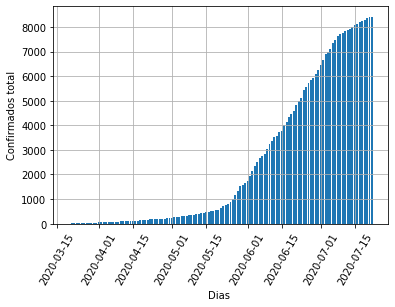

In [76]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,3].values)
plt.xlabel('Dias ')
plt.ylabel('Confirmados total')
plt.xticks(rotation=60)
plt.grid(True)

Grafico mortes totais:


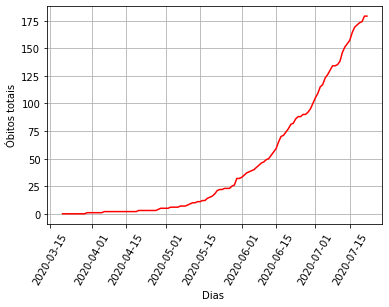

In [77]:
import matplotlib.pyplot as plt
plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,4].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos totais')
plt.xticks(rotation=60)
plt.grid(True)


Grafico confirmados diarios Micro OP:

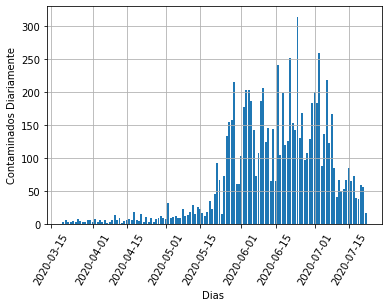

In [78]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,1].values)
plt.xlabel('Dias ')
plt.ylabel('Contaminados Diariamente')
plt.xticks(rotation=60)
plt.grid(True)

Grafico mortes diarias Micro OP:

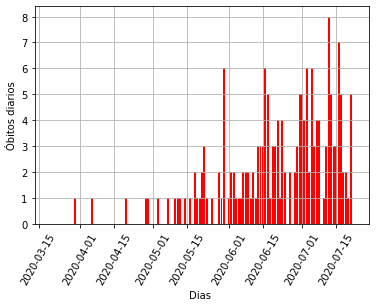

In [79]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,2].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos diarios')
plt.xticks(rotation=60)
plt.grid(True)

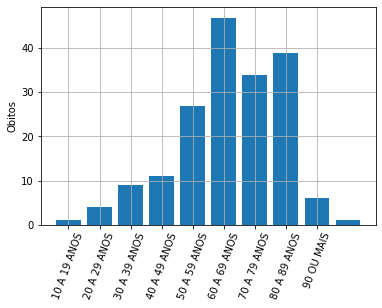

In [80]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria_mortos.iloc[:,0].values, grafico_faixa_etaria_mortos.iloc[:,1].values)
plt.ylabel('Obitos')
plt.xticks(np.arange(0, 9), rotation=70)
plt.grid(True)

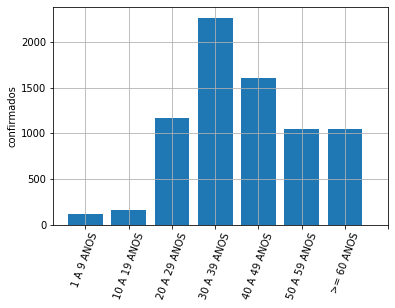

In [81]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria.iloc[:,0].values, grafico_faixa_etaria.iloc[:,1].values)
plt.ylabel('confirmados')
plt.xticks(np.arange(0, 8), rotation=70)
plt.grid(True)

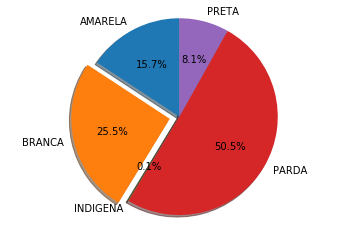

In [89]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMARELA', 'BRANCA', 'INDIGENA', 'PARDA', 'PRETA'
sizes = raca['Quantidade']
explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

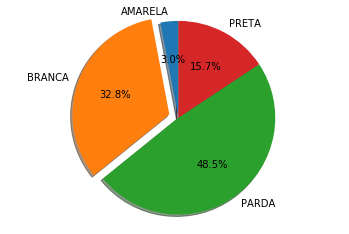

In [97]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMARELA', 'BRANCA', 'PARDA', 'PRETA'
sizes = raca_obitos['Quantidade']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

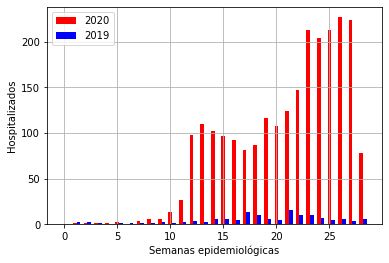

In [136]:
import numpy as np
import matplotlib.pyplot as plt

N = 29
hospitalizados_20 = X_20['Hospitalizados']
width = 0.35

ind = np.arange(N)  # the x locations for the groups

fig, ax = plt.subplots()
rects1 = ax.bar(ind, hospitalizados_20, width, color='r')

hospitalizados_19 = X_19['Hospitalizados']
rects2 = ax.bar(ind + width, hospitalizados_19, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Hospitalizados')
plt.xlabel('Semanas epidemiológicas')
plt.grid(True)

ax.legend((rects1[0], rects2[0]), ('2020', '2019'))

In [65]:
tabela.to_csv("tabela_micro_OP.csv", index = False)